Let's first setup our imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import cluster
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [14]:
df = pd.read_csv('../../DSI-CHI-1/lessons/week-07/1.3-tuning-clusters/assets/datasets/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [15]:
X = df.drop('Name', axis=1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [27]:
df['category'] = 0

for row in range(len(df)):
    if df['Name'][row] == 'Iris-setosa':
        df['category'][row] = 0
    elif df['Name'][row] == 'Iris-versicolor':
        df['category'][row] = 1
    else:
        df['category'][row] = 2

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,category
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [28]:
df['category'].value_counts()

2    50
1    50
0    50
Name: category, dtype: int64

In [29]:
y = df['category']

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

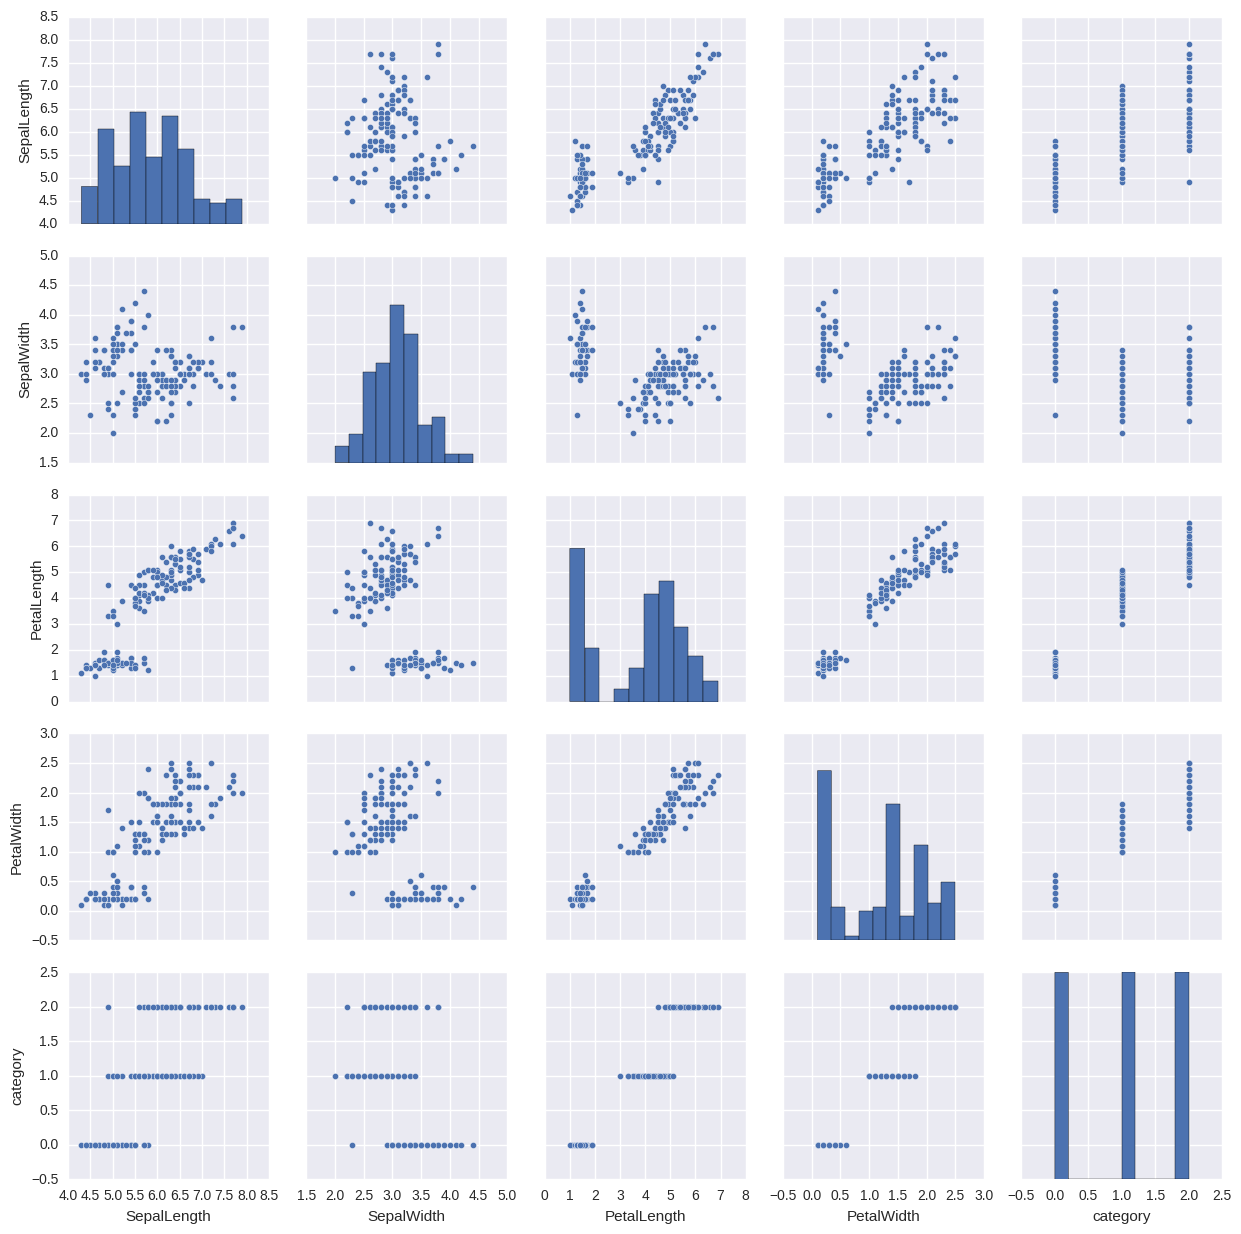

In [32]:
sns.pairplot(df)

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [33]:
from sklearn.preprocessing import StandardScaler

X_standard = StandardScaler().fit_transform(X)

In [34]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Compute the labels and centroids

In [35]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [36]:
predictions = kmeans.predict(X_standard)

In [80]:
predY = np.choose(labels, [1, 2, 3]).astype(np.int64)
predY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3])

In [38]:
sm.accuracy_score(y, predictions)

0.5

In [39]:
pd.Series(predictions).value_counts()

2    53
0    50
1    47
dtype: int64

In [40]:
df = df.join(pd.DataFrame(predictions, columns=['clusters3']))
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,category,clusters3
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [42]:
df.groupby('clusters3')['PetalLength'].value_counts()

clusters3  PetalLength
0          1.5            14
           1.4            12
           1.3             7
           1.6             7
           1.7             4
           1.2             2
           1.9             2
           1.0             1
           1.1             1
1          5.6             5
           4.7             3
           5.5             3
           5.7             3
           5.8             3
           6.1             3
           4.4             2
           4.5             2
           4.8             2
           4.9             2
           5.1             2
           5.2             2
           5.3             2
           5.4             2
           5.9             2
           6.0             2
           6.7             2
           5.0             1
           6.3             1
           6.4             1
           6.6             1
           6.9             1
2          4.5             6
           5.1             6
           4.0      

In [44]:
df.groupby('clusters3')['SepalLength'].mean()

clusters3
0    5.006000
1    6.780851
2    5.801887
Name: SepalLength, dtype: float64

In [45]:
df.groupby('clusters3')['SepalWidth'].mean()

clusters3
0    3.418000
1    3.095745
2    2.673585
Name: SepalWidth, dtype: float64

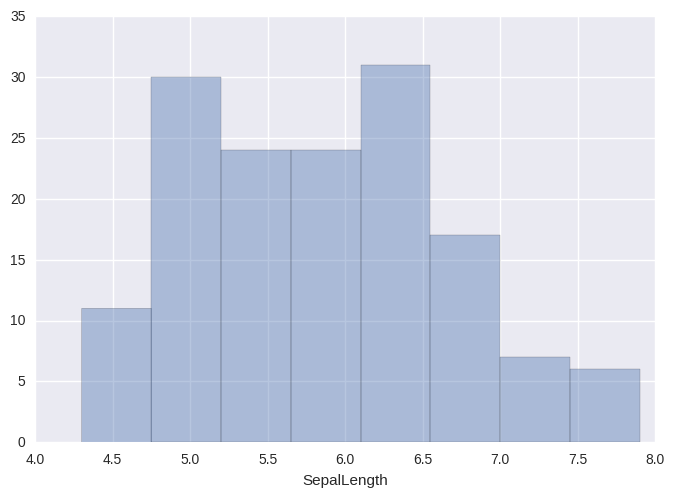

In [46]:
sns.distplot(df['SepalLength'], kde=False)

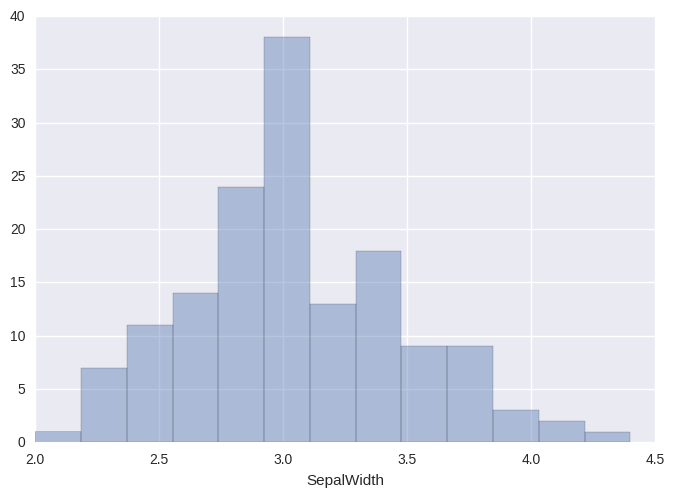

In [48]:
sns.distplot(df['SepalWidth'], kde=False)

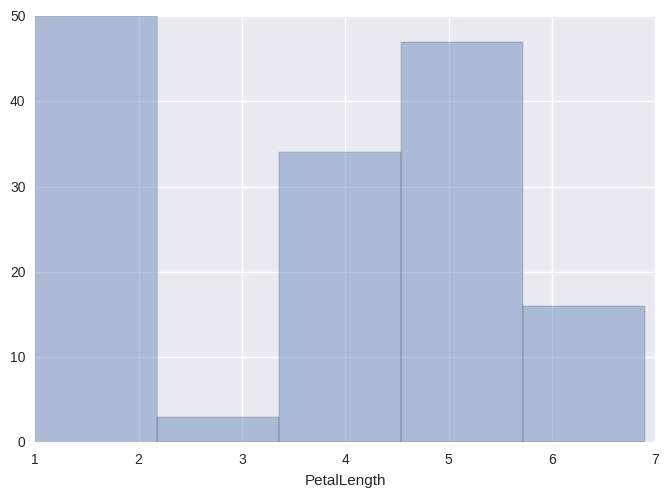

In [47]:
sns.distplot(df['PetalLength'], kde=False)

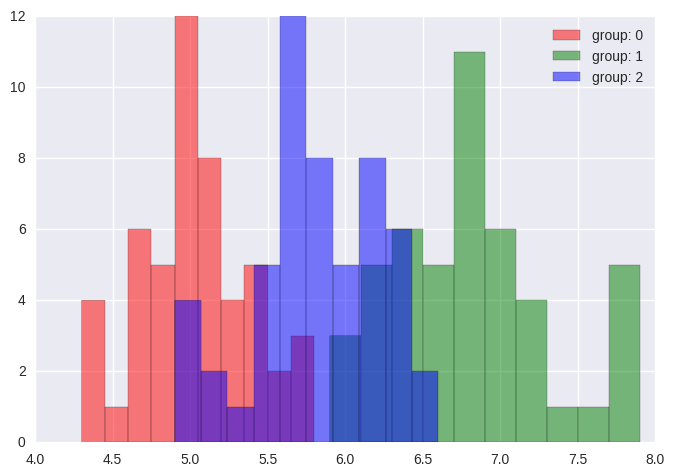

In [49]:
for x in zip(range(0, 3), ['red', 'green', 'blue']):
    plt.hist(df.loc[(df['clusters3'] == x[0]), 'SepalLength'], color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

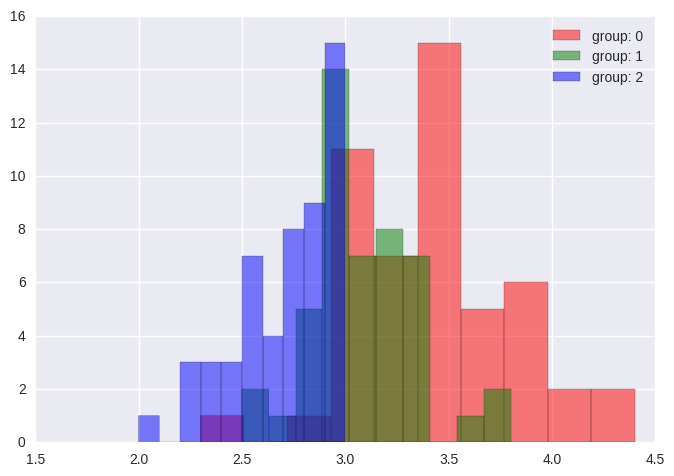

In [50]:
for x in zip(range(0, 3), ['red', 'green', 'blue']):
    plt.hist(df.loc[(df['clusters3'] == x[0]), 'SepalWidth'], color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

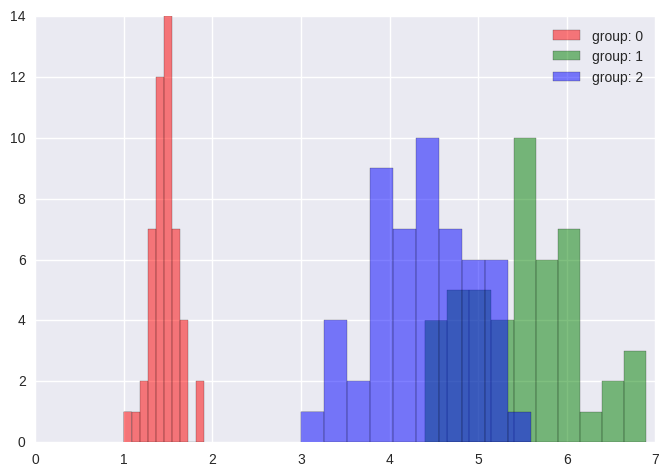

In [51]:
for x in zip(range(0, 3), ['red', 'green', 'blue']):
    plt.hist(df.loc[(df['clusters3'] == x[0]), 'PetalLength'], color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

In [78]:
def plot_pairs(x_col, y_col):
    for x in zip(range(0, 3), ['red', 'green', 'blue']):
        plt.scatter(df.loc[(df['clusters3'] == x[0]), x_col], df.loc[(df['clusters3'] == x[0]), y_col],
                    color=x[1], alpha=0.5, label='group: ' + str(x[0]))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('%s vs. %s' % (x_col, y_col))
    plt.legend()
    plt.show()

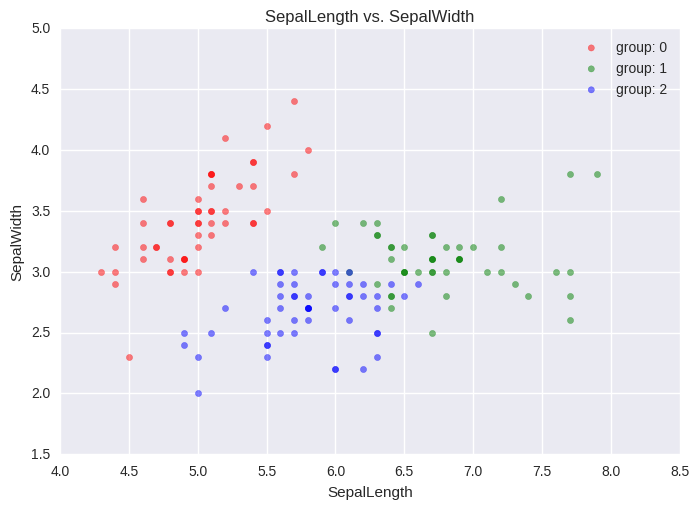

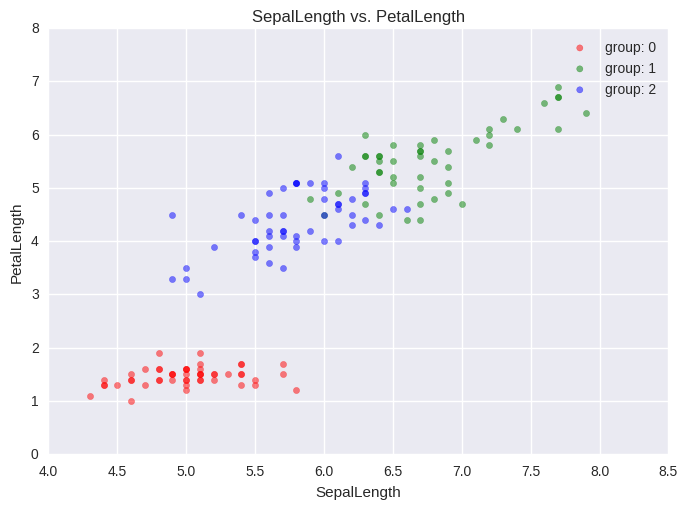

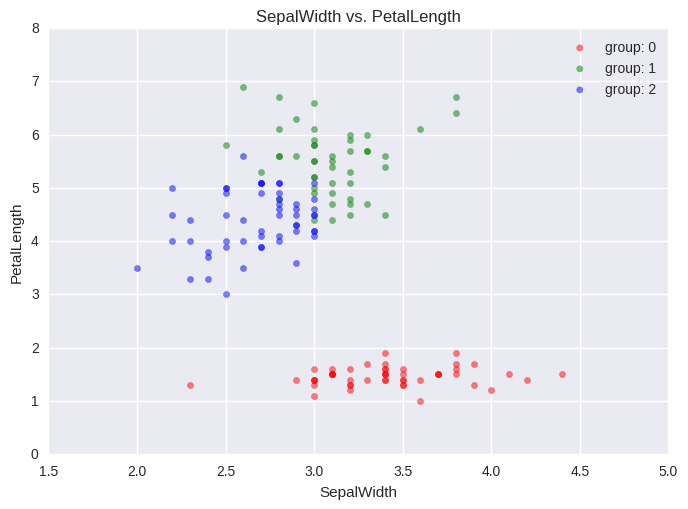

In [79]:
plot_pairs('SepalLength', 'SepalWidth')
plot_pairs('SepalLength', 'PetalLength')
plot_pairs('SepalWidth', 'PetalLength')

In [72]:
df.loc[(df['clusters3'] == 0)].describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,category,clusters3
count,50.00000,50.000000,50.000000,50.00000,50.0,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0,0.0


In [73]:
from sklearn.metrics import silhouette_score

silhouette_score(X_standard, predictions)

0.29250688129556124

In [64]:
list_of_scores = []

for x in range(2, 25):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(X_standard)
    predictions = kmeans.predict(X_standard)
    sil = silhouette_score(X_standard, predictions)
    list_of_scores.append((x, sil))

In [65]:
list_of_scores

[(2, 0.58018446325739603),
 (3, 0.45897178670187172),
 (4, 0.38585225199588602),
 (5, 0.34767483142797456),
 (6, 0.33570683759862252),
 (7, 0.33158228248461341),
 (8, 0.33863135538427147),
 (9, 0.34862408882547014),
 (10, 0.34492641686602465),
 (11, 0.36144031194583853),
 (12, 0.37388134329604572),
 (13, 0.35203341607435285),
 (14, 0.33937691419438987),
 (15, 0.33951915179118636),
 (16, 0.32298707518903136),
 (17, 0.31968847833753888),
 (18, 0.31912908967223774),
 (19, 0.31601886292964554),
 (20, 0.30771314937545041),
 (21, 0.3145314645010171),
 (22, 0.30596763173373248),
 (23, 0.33411421082880349),
 (24, 0.29250688129556124)]

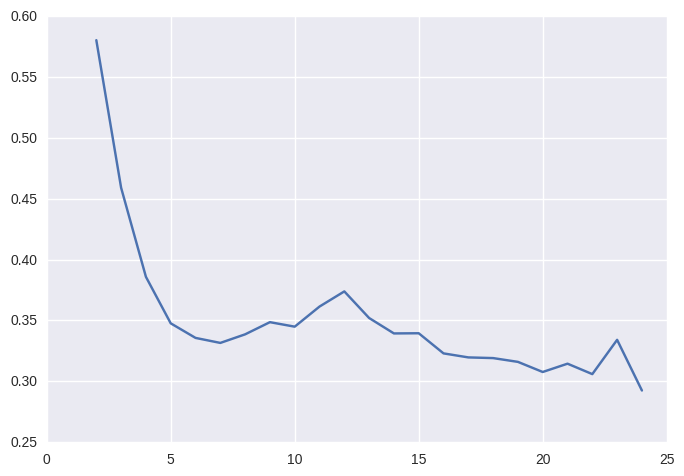

In [66]:
plt.plot([x[0] for x in list_of_scores], [x[1] for x in list_of_scores])

In [67]:
df.shape

(150, 7)

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis